<a href="https://colab.research.google.com/github/ghozialbizia/FinalAssignmentSKO/blob/main/TubesFIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import log10, sqrt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 11 #km
Hspl = 2 #km
disp_M = 20e-12 #s/km.nm
alpha_f = 0.185 #dB/km

In [3]:
Ptx = 5 #mw
Ptx_db = 10*log10(Ptx) #Ptx
spektral = 0.1 #nm
t_tx = 50e-12 #s
Mod_NRZ = 0.7 #NRZ
Mod_RZ = 0.35 #RZ
Br = 1e9 # 2.5 Gbps
Tb = 1/Br

In [4]:
Sensitivity = -27 #dBm
t_rx = 35e-12 #s

In [5]:
N_c = 2 #number of connectors
alpha_c = 0.1 #dB
N_sp = (L/Hspl)-1
alpha_sp = 0.1 #dB
Ms = 2

# Link Power Budget

In [6]:
alpha_t =N_c*alpha_c+N_sp*alpha_sp+L*alpha_f+Ms
print("The Cable Attenuation is", alpha_t,"dB")

The Cable Attenuation is 4.6850000000000005 dB


In [7]:
Prx = Ptx_db-alpha_t
Prx

2.304700043360188

In [8]:
if Prx > Sensitivity:
    print("LPB, fulfilled")
else:
    print("Try Again!")

LPB, fulfilled


# Rise Time Budget

In [9]:
t_mat = disp_M*L*spektral
t_wg = 0 #ignored
t_mod = 0 #SM

In [10]:
t_sys = sqrt(t_tx**2+
            t_mat**2+
            t_mod**2+
            t_wg**2+
            t_rx)
t_sys

5.91607978335181e-06

In [11]:
t_tx

5e-11

In [12]:
if (Tb*Mod_NRZ > t_sys) & (Tb*Mod_RZ > t_sys):
  print("RTB, fulfilled")
elif Tb*Mod_NRZ > t_sys:
  print("RTB for NRZ, fulfilled")
elif Tb*Mod_RZ > t_sys:
  print("RTB for RZ, fulfilled")
else:
  print("Try Again!")

Try Again!


Text(0.5, 1.0, 'Link Power Budget Curve')

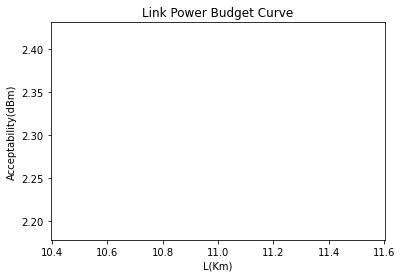

In [13]:
plt.plot(L,Prx)
plt.xlabel("L(Km)")
plt.ylabel("Acceptability(dBm)")
plt.title("Link Power Budget Curve")

Text(0.5, 1.0, 'Rise Time Budget Curve')

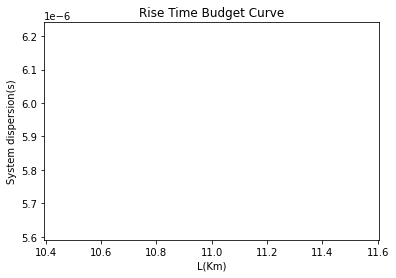

In [14]:
plt.plot(L,t_sys)
plt.xlabel("L(Km)")
plt.ylabel("System dispersion(s)")
plt.title("Rise Time Budget Curve")